# Topic Modelling

Author: Jesús Cid Sueiro

Date: 2016/11/27

In this notebook we will explore some tools for text analysis in python. To do so, first we will import the requested python libraries.

In [1]:
%matplotlib inline

# Required imports
from wikitools import wiki
from wikitools import category

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import gensim

import numpy as np
import lda
import lda.datasets

from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

import matplotlib.pyplot as plt
import pylab

from test_helper import Test

## 1. Corpus acquisition.

In this notebook we will explore some tools for text processing and analysis and two topic modeling algorithms available from Python toolboxes.

To do so, we will explore and analyze collections of Wikipedia articles from a given category, using `wikitools`, that makes easy the capture of content from wikimedia sites.

(*As a side note, there are many other available text collections to test topic modelling algorithm. In particular, the NLTK library has many examples, that can explore them using the `nltk.download()` tool*.

    import nltk
    nltk.download()

*for instance, you can take the gutemberg dataset*

    Mycorpus = nltk.corpus.gutenberg
    text_name = Mycorpus.fileids()[0]
    raw = Mycorpus.raw(text_name)
    Words = Mycorpus.words(text_name)

*Also, tools like Gensim or Sci-kit learn include text databases to work with*).

In order to use Wikipedia data, we will select a single category of articles:

In [2]:
site = wiki.Wiki("https://en.wikipedia.org/w/api.php")
# Select a category with a reasonable number of articles (>100)
# cat = "Economics"
cat = "Pseudoscience"
print cat

Pseudoscience


You can try with any other categories. Take into account that the behavior of topic modelling algorithms may depend on the amount of documents available for the analysis. Select a category with at least 100 articles. You can browse the wikipedia category tree here, https://en.wikipedia.org/wiki/Category:Contents, for instance.

We start downloading the text collection.

In [3]:
# Loading category data. This may take a while
print "Loading category data. This may take a while..."
cat_data = category.Category(site, cat)

corpus_titles = []
corpus_text = []

for n, page in enumerate(cat_data.getAllMembersGen()):
    print "\r Loading article {0}".format(n + 1),
    corpus_titles.append(page.title)
    corpus_text.append(page.getWikiText())

n_art = len(corpus_titles)
print "\nLoaded " + str(n_art) + " articles from category " + cat

Loading category data. This may take a while...
 Loading article 359 
Loaded 359 articles from category Pseudoscience


Now, we have stored the whole text collection in two lists:

* `corpus_titles`, which contains the titles of the selected articles
* `corpus_text`, with the text content of the selected wikipedia articles

You can browse the content of the wikipedia articles to get some intuition about the kind of documents that will be processed.

In [4]:
# n = 5
# print corpus_titles[n]
# print corpus_text[n]

## 2. Corpus Processing

Topic modelling algorithms process vectorized data. In order to apply them, we need to transform the raw text input data into a vector representation. To do so, we will remove irrelevant information from the text data and preserve as much relevant information as possible to capture the semantic content in the document collection.

Thus, we will proceed with the following steps:

1. Tokenization, filtering and cleaning
2. Homogeneization (stemming or lemmatization)
3. Vectorization

### 2.1. Tokenization, filtering and cleaning.

The first steps consists on the following:

1. Tokenization: convert text string into lists of tokens.
2. Filtering:
  * Removing capitalization: capital alphabetic characters will be transformed to their corresponding lowercase characters. 
  * Removing non alphanumeric tokens (e.g. punktuation signs)
3. Cleaning: Removing stopwords, i.e., those words that are very common in language and do not carry out useful semantic content (articles, pronouns, etc).

To do so, we will need some packages from the [Natural Language Toolkit](http://www.nltk.org). 

In [5]:
# You can comment this if the package is already available.
# Select option "d) Download", and identifier "punkt"
# Select option "d) Download", and identifier "stopwords"
# nltk.download()

In [6]:
stopwords_en = stopwords.words('english')
corpus_clean = []

for n, art in enumerate(corpus_text): 
    print "\rProcessing article {0} out of {1}".format(n + 1, n_art),
    # This is to make sure that all characters have the appropriate encoding.
    art = art.decode('utf-8')  
    
    # Tokenize each text entry. 
    # scode: tokens = <FILL IN>
    token_list = word_tokenize(art)
    
    # Convert all tokens in token_list to lowercase, remove non alfanumeric tokens and stem.
    # Store the result in a new token list, clean_tokens.
    # scode: filtered_tokens = <FILL IN>
    filtered_tokens = [token.lower() for token in token_list if token.isalnum()]

    # Remove all tokens in the stopwords list and append the result to corpus_clean
    # scode: clean_tokens = <FILL IN>
    clean_tokens = [token for token in filtered_tokens if token not in stopwords_en]    

    # scode: <FILL IN>
    corpus_clean.append(clean_tokens)
print "\nLet's check the first tokens from document 0 after processing:"
print corpus_clean[0][0:30]

Processing article 359 out of 359 
Let's check the first tokens from document 0 after processing:
[u'see', u'topics', u'characterized', u'pseudoscience', u'pseudoscience', u'consists', u'claims', u'belief', u'practices', u'presented', u'plausible', u'scientifically', u'justifiable', u'scientific', u'method', u'tag', u'pretended', u'spurious', u'science', u'collection', u'related', u'beliefs', u'world', u'mistakenly', u'regarded', u'based', u'scientific', u'method', u'status', u'scientific']


In [7]:
Test.assertTrue(len(corpus_clean) == n_art, 'List corpus_clean does not contain the expected number of articles')
Test.assertTrue(len([c for c in corpus_clean[0] if c in stopwords_en])==0, 'Stopwords have not been removed')

1 test passed.
1 test passed.


### 2.2. Stemming vs Lemmatization

At this point, we can choose between applying a simple stemming or ussing lemmatization. We will try both to test their differences.

**Task**: Apply the `.stem()` method, from the stemmer object created in the first line, to `corpus_filtered`.

In [8]:
# Select stemmer.
stemmer = nltk.stem.SnowballStemmer('english')
corpus_stemmed = []

for n, token_list in enumerate(corpus_clean):
    print "\rStemming article {0} out of {1}".format(n + 1, n_art),
    
    # Convert all tokens in token_list to lowercase, remove non alfanumeric tokens and stem.
    # Store the result in a new token list, clean_tokens.
    # scode: stemmed_tokens = <FILL IN>
    stemmed_tokens = [stemmer.stem(token) for token in token_list]
    
    # Add art to the stemmed corpus
    # scode: <FILL IN>
    corpus_stemmed.append(stemmed_tokens)

print "\nLet's check the first tokens from document 0 after stemming:"
print corpus_stemmed[0][0:30]

Stemming article 359 out of 359 
Let's check the first tokens from document 0 after stemming:
[u'see', u'topic', u'character', u'pseudosci', u'pseudosci', u'consist', u'claim', u'belief', u'practic', u'present', u'plausibl', u'scientif', u'justifi', u'scientif', u'method', u'tag', u'pretend', u'spurious', u'scienc', u'collect', u'relat', u'belief', u'world', u'mistaken', u'regard', u'base', u'scientif', u'method', u'status', u'scientif']


In [9]:
Test.assertTrue((len([c for c in corpus_stemmed[0] if c!=stemmer.stem(c)]) < 0.1*len(corpus_stemmed[0])), 
                'It seems that stemming has not been applied properly')

1 test passed.


Alternatively, we can apply lemmatization. For english texts, we can use the lemmatizer from NLTK, which is based on [WordNet](http://wordnet.princeton.edu). If you have not used wordnet before, you will likely need to download it from nltk

In [10]:
# You can comment this if the package is already available.
# Select option "d) Download", and identifier "wordnet"
# nltk.download()

**Task**: Apply the `.lemmatize()` method, from the WordNetLemmatizer object created in the first line, to `corpus_filtered`.

In [11]:
wnl = WordNetLemmatizer()

# Select stemmer.
corpus_lemmat = []

for n, token_list in enumerate(corpus_clean):
    print "\rLemmatizing article {0} out of {1}".format(n + 1, n_art),
    
    # scode: lemmat_tokens = <FILL IN>
    lemmat_tokens = [wnl.lemmatize(token) for token in token_list]

    # Add art to the stemmed corpus
    # scode: <FILL IN>
    corpus_lemmat.append(lemmat_tokens)

print "\nLet's check the first tokens from document 0 after stemming:"
print corpus_lemmat[0][0:30]

Lemmatizing article 359 out of 359 
Let's check the first tokens from document 0 after stemming:
[u'see', u'topic', u'characterized', u'pseudoscience', u'pseudoscience', u'consists', u'claim', u'belief', u'practice', u'presented', u'plausible', u'scientifically', u'justifiable', u'scientific', u'method', u'tag', u'pretended', u'spurious', u'science', u'collection', u'related', u'belief', u'world', u'mistakenly', u'regarded', u'based', u'scientific', u'method', u'status', u'scientific']


One of the advantages of the lemmatizer method is that the result of lemmmatization is still a true word, which is more advisable for the presentation of text processing results and lemmatization.

However, without using contextual information, lemmatize() does not remove grammatical differences. This is the reason why "is" or "are" are preserved and not replaced by infinitive "be".

As an alternative, we can apply .lemmatize(word, pos), where 'pos' is a string code specifying the part-of-speech (pos), i.e. the grammatical role of the words in its sentence. For instance, you can check the difference between `wnl.lemmatize('is')` and `wnl.lemmatize('is, pos='v')`.

### 2.3. Vectorization

Up to this point, we have transformed the raw text collection of articles in a list of articles, where each article is a collection of the word roots that are most relevant for semantic analysis. Now, we need to convert these data (a list of token lists) into a numerical representation (a list of vectors, or a matrix). To do so, we will start using the tools provided by the `gensim` library. 

As a first step, we create a dictionary containing all tokens in our text corpus, and assigning an integer identifier to each one of them.

In [12]:
# Create dictionary of tokens
D = gensim.corpora.Dictionary(corpus_clean)
n_tokens = len(D)

print "The dictionary contains {0} tokens".format(n_tokens)
print "First tokens in the dictionary: "
for n in range(10):
    print str(n) + ": " + D[n]

The dictionary contains 44712 tokens
First tokens in the dictionary: 
0: systematic
1: magnetic
2: pejorative
3: four
4: consists
5: integrity
6: founder
7: navels
8: unanswered
9: presents


In the second step, let us create a numerical version of our corpus using the `doc2bow` method. In general, `D.doc2bow(token_list)` transform any list of tokens into a list of tuples `(token_id, n)`, one per each token in `token_list`, where `token_id` is the token identifier (according to dictionary `D`) and `n` is the number of occurrences of such token in `token_list`. 

** Task**: Apply the `doc2bow` method from gensim dictionary `D`, to all tokens in every article in `corpus_clean`. The result must be a new list named `corpus_bow` where each element is a list of tuples `(token_id, number_of_occurrences)`.

In [13]:
# Transform token lists into sparse vectors on the D-space
corpus_bow = [D.doc2bow(doc) for doc in corpus_clean]

In [14]:
Test.assertTrue(len(corpus_bow)==n_art, 'corpus_bow has not the appropriate size') 

1 test passed.


At this point, it is good to make sure to understand what has happened. In `corpus_clean` we had a list of token lists. With it, we have constructed a Dictionary, `D`, which assign an integer identifier to each token in the corpus.
After that, we have transformed each article (in `corpus_clean`) in a list tuples `(id, n)`. 

In [15]:
print "Original article (after cleaning): "
print corpus_clean[0][0:30]
print "Sparse vector representation (first 30 components):"
print corpus_bow[0][0:30]
print "The first component, {0} from document 0, states that token 0 ({1}) appears {2} times".format(
    corpus_bow[0][0], D[0], corpus_bow[0][0][1])

Original article (after cleaning): 
[u'see', u'topics', u'characterized', u'pseudoscience', u'pseudoscience', u'consists', u'claims', u'belief', u'practices', u'presented', u'plausible', u'scientifically', u'justifiable', u'scientific', u'method', u'tag', u'pretended', u'spurious', u'science', u'collection', u'related', u'beliefs', u'world', u'mistakenly', u'regarded', u'based', u'scientific', u'method', u'status', u'scientific']
Sparse vector representation (first 30 components):
[(0, 2), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 3), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 2), (27, 147), (28, 1), (29, 1)]
The first component, (0, 2) from document 0, states that token 0 (systematic) appears 2 times


Note that we can interpret each element of corpus_bow as a `sparse_vector`. For example, a list of tuples 

    [(0, 1), (3, 3), (5,2)] 

for a dictionary of 10 elements can be represented as a vector, where any tuple `(id, n)` states that position `id` must take value `n`. The rest of positions must be zero.

    [1, 0, 0, 3, 0, 2, 0, 0, 0, 0]

These sparse vectors will be the inputs to the topic modeling algorithms.

Note that, at this point, we have built a Dictionary containing

In [16]:
print "{0} tokens".format(len(D))

44712 tokens


and a bow representation of a corpus with

In [17]:
print "{0} Wikipedia articles".format(len(corpus_bow))

359 Wikipedia articles


Before starting with the semantic analyisis, it is interesting to observe the token distribution for the given corpus.

In [18]:
# SORTED TOKEN FREQUENCIES (I):
# Create a "flat" corpus with all tuples in a single list
corpus_bow_flat = [item for sublist in corpus_bow for item in sublist]

# Initialize a numpy array that we will use to count tokens.
# token_count[n] should store the number of ocurrences of the n-th token, D[n]
token_count = np.zeros(n_tokens)

# Count the number of occurrences of each token.
for x in corpus_bow_flat:
    # Update the proper element in token_count
    # scode: <FILL IN>
    token_count[x[0]] += x[1]

# Sort by decreasing number of occurences
ids_sorted = np.argsort(- token_count)
tf_sorted = token_count[ids_sorted]

`ids_sorted` is a list of all token ids, sorted by decreasing number of occurrences in the whole corpus. For instance, the most frequent term is 

In [19]:
print D[ids_sorted[0]]

ref


which appears

In [20]:
print "{0} times in the whole corpus".format(tf_sorted[0])

16713.0 times in the whole corpus


In the following we plot the most frequent terms in the corpus.

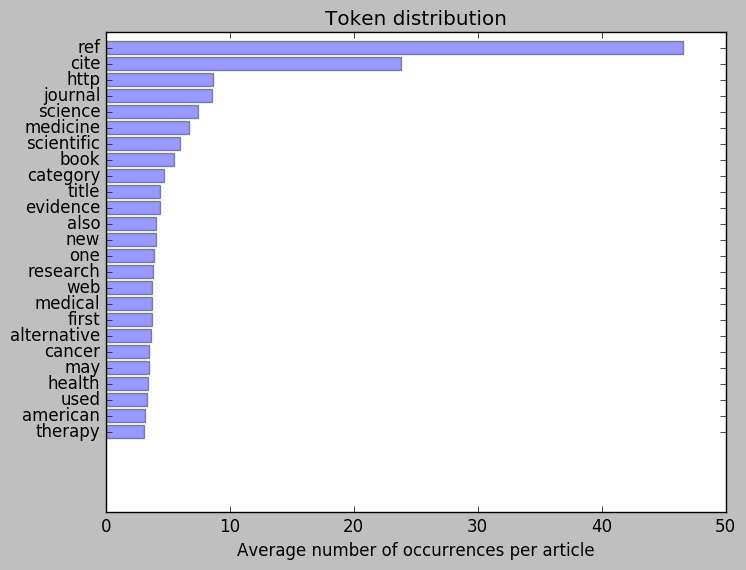

In [21]:
# SORTED TOKEN FREQUENCIES (II):
plt.rcdefaults()

# Example data
n_bins = 25
hot_tokens = [D[i] for i in ids_sorted[n_bins-1::-1]]
y_pos = np.arange(len(hot_tokens))
z = tf_sorted[n_bins-1::-1]/n_art

plt.barh(y_pos, z, align='center', alpha=0.4)
plt.yticks(y_pos, hot_tokens)
plt.xlabel('Average number of occurrences per article')
plt.title('Token distribution')
plt.show()

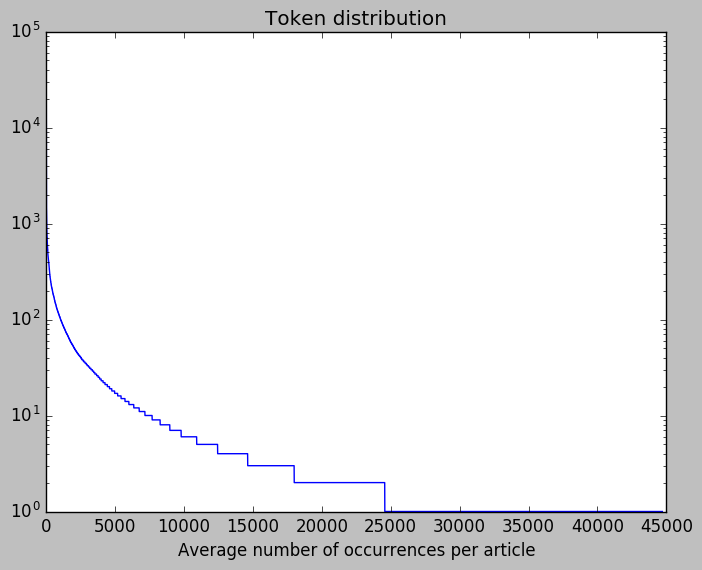

In [22]:
# SORTED TOKEN FREQUENCIES:

# Example data
plt.semilogy(tf_sorted)
plt.xlabel('Average number of occurrences per article')
plt.title('Token distribution')
plt.show()

** Exercise**: There are usually many tokens that appear with very low frequency in the corpus. Count the number of tokens appearing only once, and what is the proportion of them in the token list.

In [24]:
# scode: <WRITE YOUR CODE HERE>
# Example data
cold_tokens = [D[i] for i in ids_sorted if tf_sorted[i]==1]

print "There are {0} cold tokens, which represent {1}% of the total number of tokens in the dictionary".format(
    len(cold_tokens), float(len(cold_tokens))/n_tokens*100)

There are 20151 cold tokens, which represent 45.0684380032% of the total number of tokens in the dictionary


** Exercise**: Represent graphically those 20 tokens that appear in the highest number of articles. Note that you can use the code above (headed by `# SORTED TOKEN FREQUENCIES`) with a very minor modification.

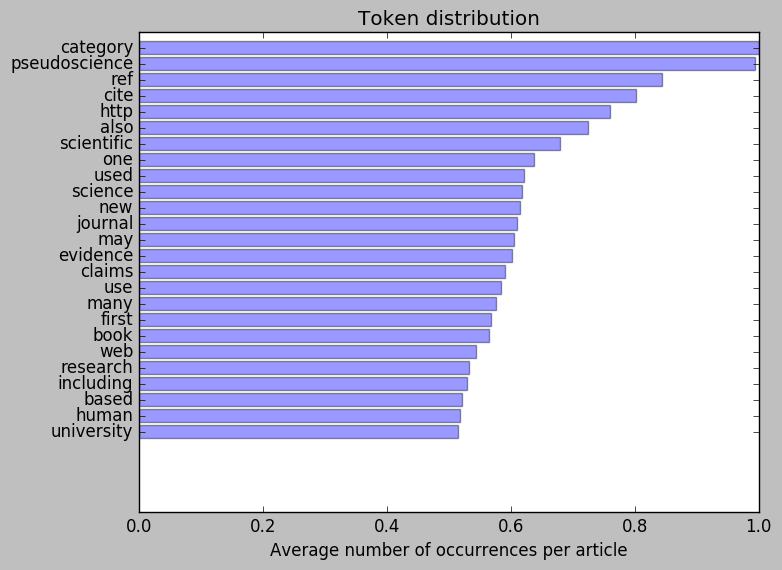

In [25]:
# scode: <WRITE YOUR CODE HERE>

# SORTED TOKEN FREQUENCIES (I):
# Count the number of occurrences of each token.
token_count2 = np.zeros(n_tokens)
for x in corpus_bow_flat:
    token_count2[x[0]] += (x[1]>0)

# Sort by decreasing number of occurences
ids_sorted2 = np.argsort(- token_count2)
tf_sorted2 = token_count2[ids_sorted2]

# SORTED TOKEN FREQUENCIES (II):
# Example data
n_bins = 25
hot_tokens2 = [D[i] for i in ids_sorted2[n_bins-1::-1]]
y_pos2 = np.arange(len(hot_tokens2))
z2 = tf_sorted2[n_bins-1::-1]/n_art

plt.barh(y_pos2, z2, align='center', alpha=0.4)
plt.yticks(y_pos2, hot_tokens2)
plt.xlabel('Average number of occurrences per article')
plt.title('Token distribution')
plt.show()

## 3. Semantic Analysis

The dictionary `D` and the Bag of Words in `corpus_bow` are the key inputs to the topic model algorithms. In this section we will explore two algorithms:

1. Latent Semantic Indexing (LSI)
2. Latent Dirichlet Allocation (LDA)

The topic model algorithms in `gensim` assume that input documents are parameterized using the tf-idf model. This can be done using

In [26]:
tfidf = gensim.models.TfidfModel(corpus_bow)

From now on, tfidf can be used to convert any vector from the old representation (bow integer counts) to the new one (TfIdf real-valued weights):

In [28]:
doc_bow = [(0, 1), (1, 1)]
tfidf[doc_bow]

[(0, 0.6410406170794578), (1, 0.7675069558345305)]

Or to apply a transformation to a whole corpus

In [29]:
corpus_tfidf = tfidf[corpus_bow]
print corpus_tfidf[0][0:5]

[(0, 0.01008360066280908), (1, 0.006036461218185464), (2, 0.020970503696900015), (3, 0.004131709927129921), (4, 0.014121006630463492)]


### 3.1. Latent Semantic Indexing (LSI)

Now we are ready to apply a topic modeling algorithm. Latent Semantic Indexing is provided by `LsiModel`.

**Task**: Generate a LSI model with 5 topics for `corpus_tfidf` and dictionary `D`. You can check de sintaxis for [gensim.models.LsiModel](https://radimrehurek.com/gensim/models/lsimodel.html).

In [30]:
# Initialize an LSI transformation
n_topics = 5

# scode: lsi = <FILL IN>
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=D, num_topics=n_topics) 

From LSI, we can check both the topic-tokens matrix and the document-topics matrix.

Now we can check the topics generated by LSI. An intuitive visualization is provided by the `show_topics` method.

In [31]:
lsi.show_topics(num_topics=-1, num_words=10, log=False, formatted=True)

[(0,
  u'-0.163*"cancer" + -0.162*"ref" + -0.122*"intelligent" + -0.122*"design" + -0.116*"medicine" + -0.112*"cite" + -0.100*"science" + -0.097*"parapsychology" + -0.095*"cat" + -0.092*"journal"'),
 (1,
  u'-0.758*"cat" + -0.315*"commons" + -0.186*"contentious" + -0.159*"obsolete" + 0.133*"cancer" + -0.128*"psychic" + -0.124*"powers" + -0.105*"geodesy" + -0.090*"design" + -0.087*"earth"'),
 (2,
  u'0.373*"intelligent" + 0.361*"design" + -0.301*"cancer" + 0.212*"creationism" + 0.210*"evolution" + -0.174*"cat" + 0.161*"creation" + -0.121*"medicine" + -0.112*"alternative" + 0.105*"science"'),
 (3,
  u'0.301*"cancer" + -0.295*"parapsychology" + -0.195*"paranormal" + -0.183*"psychic" + 0.168*"intelligent" + 0.164*"design" + -0.162*"esp" + -0.158*"experiments" + -0.139*"telepathy" + -0.120*"remote"'),
 (4,
  u'0.469*"cancer" + 0.211*"design" + -0.197*"earth" + 0.192*"parapsychology" + 0.176*"intelligent" + 0.126*"psychic" + 0.112*"paranormal" + 0.104*"esp" + 0.100*"telepathy" + -0.090*"moon

However, a more useful representation of topics is as a list of tuples `(token, value)`. This is provided by the `show_topic` method.

**Task**: Represent the columns of the topic-token matrix as a series of bar diagrams (one per topic) with the top 25 tokens of each topic.

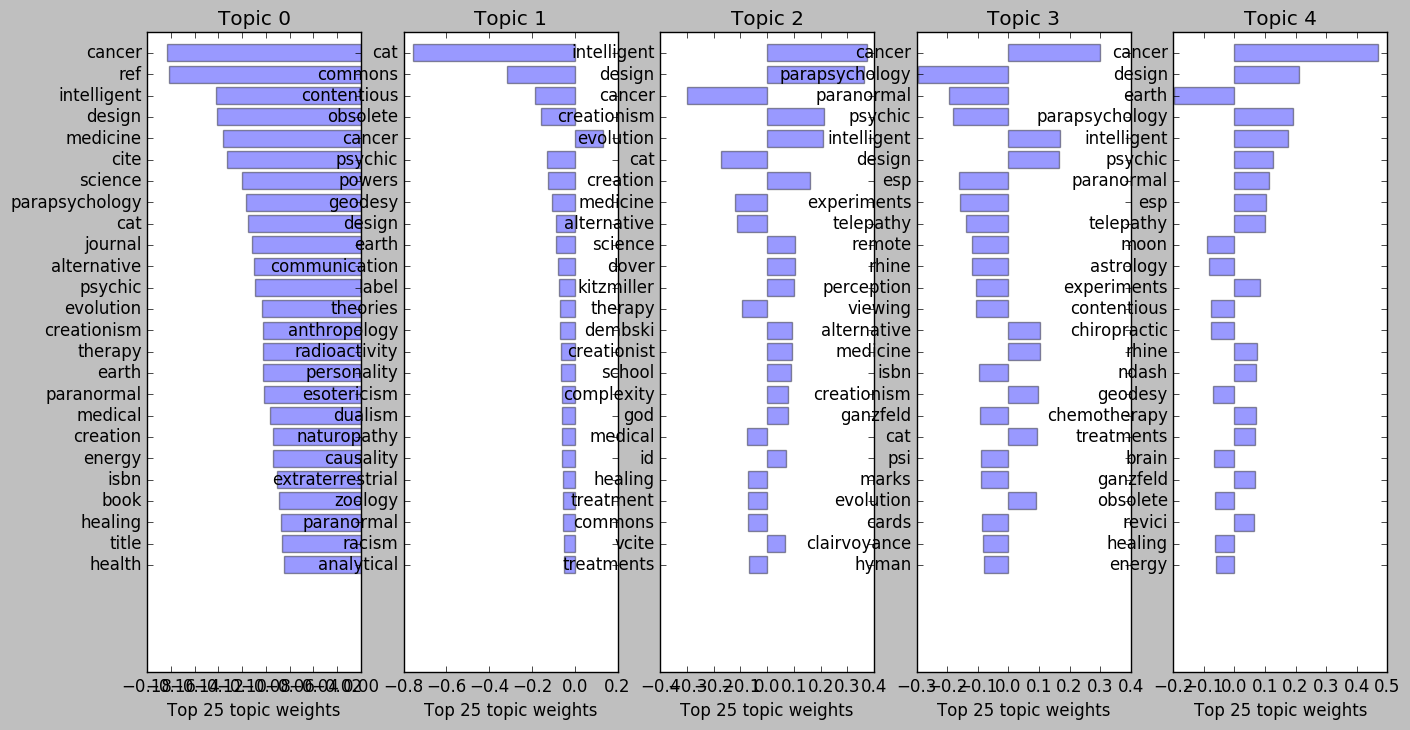

In [50]:
# SORTED TOKEN FREQUENCIES (II):
plt.rcdefaults()

n_bins = 25
    
# Example data
y_pos = range(n_bins-1, -1, -1)

pylab.rcParams['figure.figsize'] = 16, 8  # Set figure size
for i in range(n_topics):
    
    ### Plot top 25 tokens for topic i
    # Read i-thtopic
    # scode: <FILL IN>
    topic_i = lsi.show_topic(i, topn=n_bins)
    tokens = [t[0] for t in topic_i]
    weights = [t[1] for t in topic_i]

    # Plot
    # scode: <FILL IN>
    plt.subplot(1, n_topics, i+1)
    plt.barh(y_pos, weights, align='center', alpha=0.4)
    plt.yticks(y_pos, tokens)
    plt.xlabel('Top {0} topic weights'.format(n_bins))
    plt.title('Topic {0}'.format(i))
    
plt.show()

LSI approximates any document as a linear combination of the topic vectors. We can compute the topic weights for any input corpus entered as input to the `lsi` model.

In [33]:
# On real corpora, target dimensionality of
# 200–500 is recommended as a “golden standard”
# Create a double wrapper over the original 
# corpus bow  tfidf  fold-in-lsi
corpus_lsi = lsi[corpus_tfidf]
print corpus_lsi[0]

[(0, -0.38313510265426526), (1, 0.02073947483234645), (2, 0.079670796251513409), (3, -0.05602098769399963), (4, -0.10483294234170717)]


**Task**: Find the document with the largest positive weight for topic 0. Compare the document and the topic.

In [34]:
# Extract weights from corpus_lsi
# scode weight0 = <FILL IN>
weight0 = [doc[0][1] if doc != [] else -np.inf for doc in corpus_lsi]

# Locate the maximum positive weight
nmax = np.argmax(weight0)
print nmax
print weight0[nmax]
print corpus_lsi[nmax]

# Get topic 0
# scode: topic_0 = <FILL IN>
topic_0 = lsi.show_topic(0, topn=n_bins)

# Compute a list of tuples (token, wordcount) for all tokens in topic_0, where wordcount is the number of 
# occurences of the token in the article.
# scode: token_counts = <FILL IN>
token_counts = [(t[0], corpus_clean[nmax].count(t[0])) for t in topic_0]

print "Topic 0 is:"
print topic_0
print "Token counts:"
print token_counts

324
9.24011035586e-05
[(0, 9.2401103558608302e-05), (1, -0.0008911662871724323), (2, -0.0021801105038539016), (3, -0.0034109765793003555), (4, 0.00013243990952392163)]
Topic 0 is:
[(u'cancer', -0.16299615550034205), (u'ref', -0.16204334394637257), (u'intelligent', -0.12241764854455867), (u'design', -0.1216208934894871), (u'medicine', -0.11622994292289084), (u'cite', -0.11243309400479952), (u'science', -0.10001405178729662), (u'parapsychology', -0.096860101240488314), (u'cat', -0.095048458814507464), (u'journal', -0.091667322442608778), (u'alternative', -0.090272226407602976), (u'psychic', -0.089635371366803579), (u'evolution', -0.083491820622816043), (u'creationism', -0.082764583623046756), (u'therapy', -0.082484498373547627), (u'earth', -0.082186451355489659), (u'paranormal', -0.081677342695715097), (u'medical', -0.076518104421351346), (u'creation', -0.074284930674208299), (u'energy', -0.073838907070382695), (u'isbn', -0.071090439750478837), (u'book', -0.068606782635001307), (u'healin

### 3.2. Latent Dirichlet Allocation (LDA)

There are several implementations of the LDA topic model in python:

* Python library `lda`.
* Gensim module: `gensim.models.ldamodel.LdaModel`
* Sci-kit Learn module: `sklearn.decomposition`

#### 3.2.1. LDA using Gensim

The use of the LDA module in `gensim` is similar to LSI. Furthermore, it assumes that a `tf-idf` parametrization is used as an input, which is not in complete agreement with the theoretical model, which assumes documents represented as vectors of token-counts.

To use LDA in gensim, we must first create a lda model object.

In [35]:
ldag = gensim.models.ldamodel.LdaModel(
    corpus=corpus_tfidf, id2word=D, num_topics=10, update_every=1, passes=10)

In [36]:
ldag.print_topics()

[(0,
  u'0.000*cayce + 0.000*attunement + 0.000*cryptozoology + 0.000*orientation + 0.000*bracelets + 0.000*container + 0.000*dualism + 0.000*sexual + 0.000*vmsk + 0.000*fc'),
 (1,
  u'0.000*chiropractic + 0.000*ayurveda + 0.000*colon + 0.000*ganzfeld + 0.000*earthquake + 0.000*grapefruit + 0.000*ayurvedic + 0.000*chiropractors + 0.000*reich + 0.000*pseudophysics'),
 (2,
  u'0.000*neuropsychology + 0.000*attachment + 0.000*burzynski + 0.000*buteyko + 0.000*programming + 0.000*xango + 0.000*amen + 0.000*edgerly + 0.000*psychometry + 0.000*vril'),
 (3,
  u'0.000*cat + 0.000*amen + 0.000*instincts + 0.000*metabolic + 0.000*phiten + 0.000*naturopathic + 0.000*moerman + 0.000*crackpot + 0.000*bta + 0.000*wiktionarycat2'),
 (4,
  u'0.000*cat + 0.000*obsolete + 0.000*dowsing + 0.000*earth + 0.000*allergy + 0.000*geodesy + 0.000*anthropology + 0.000*racism + 0.000*personality + 0.000*commons'),
 (5,
  u'0.001*ref + 0.001*cancer + 0.001*cite + 0.001*medicine + 0.001*therapy + 0.001*journal + 0.

#### 3.2.2. LDA using python lda library

An alternative to gensim for LDA is the lda library from python. It requires a doc-frequency matrix as input

In [37]:
# For testing LDA, you can use the reuters dataset
# X = lda.datasets.load_reuters()
# vocab = lda.datasets.load_reuters_vocab()
# titles = lda.datasets.load_reuters_titles()
X = np.int32(np.zeros((n_art, n_tokens)))
for n, art in enumerate(corpus_bow):
    for t in art:
        X[n, t[0]] = t[1]
print X.shape
print X.sum()

vocab = D.values()
titles = corpus_titles


(359, 44712)
580540


In [38]:
# Default parameters:
# model = lda.LDA(n_topics, n_iter=2000, alpha=0.1, eta=0.01, random_state=None, refresh=10)
model = lda.LDA(n_topics=10, n_iter=1500, random_state=1)
model.fit(X)  # model.fit_transform(X) is also available
topic_word = model.topic_word_  # model.components_ also works

# Show topics...
n_top_words = 8
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
    print('Topic {}: {}'.format(i, ' '.join(topic_words)))

INFO:lda:n_documents: 359
INFO:lda:vocab_size: 44712
INFO:lda:n_words: 580540
INFO:lda:n_topics: 10
INFO:lda:n_iter: 1500
INFO:lda:<0> log likelihood: -6833326
INFO:lda:<10> log likelihood: -5683119
INFO:lda:<20> log likelihood: -5481293
INFO:lda:<30> log likelihood: -5422639
INFO:lda:<40> log likelihood: -5395267
INFO:lda:<50> log likelihood: -5377075
INFO:lda:<60> log likelihood: -5366871
INFO:lda:<70> log likelihood: -5357864
INFO:lda:<80> log likelihood: -5350104
INFO:lda:<90> log likelihood: -5345917
INFO:lda:<100> log likelihood: -5341577
INFO:lda:<110> log likelihood: -5337858
INFO:lda:<120> log likelihood: -5333809
INFO:lda:<130> log likelihood: -5329261
INFO:lda:<140> log likelihood: -5324101
INFO:lda:<150> log likelihood: -5321775
INFO:lda:<160> log likelihood: -5319380
INFO:lda:<170> log likelihood: -5317579
INFO:lda:<180> log likelihood: -5314674
INFO:lda:<190> log likelihood: -5312316
INFO:lda:<200> log likelihood: -5311771
INFO:lda:<210> log likelihood: -5309576
INFO:lda:

UnicodeEncodeError: 'ascii' codec can't encode character u'\xfc' in position 4: ordinal not in range(128)

Document-topic distribution

In [39]:
doc_topic = model.doc_topic_
for i in range(10):
    print("{} (top topic: {})".format(titles[i], doc_topic[i].argmax()))

Pseudoscience (top topic: 7)
List of topics characterized as pseudoscience (top topic: 0)
Acupuncture (top topic: 0)
All About Radiation (top topic: 4)
Alternative cancer treatments (top topic: 6)
Alternative medicine (top topic: 0)
Amen Clinics (top topic: 4)
Daniel Amen (top topic: 4)
American Indian creationism (top topic: 2)
Ancient Aliens (top topic: 8)


In [40]:
# This is to apply the model to a new doc(s)
# doc_topic_test = model.transform(X_test)
# for title, topics in zip(titles_test, doc_topic_test):
#    print("{} (top topic: {})".format(title, topics.argmax()))

It allows incremental updates

#### 3.2.2. LDA using Sci-kit Learn

The input matrix to the `sklearn` implementation of LDA contains the token-counts for all documents in the corpus.
`sklearn` contains a powerfull `CountVectorizer` method that can be used to construct the input matrix from the `corpus_bow`. 

First, we will define an auxiliary function to print the top tokens in the model, that has been taken from the `sklearn` documentation.

In [41]:
# Adapted from an example in sklearn site 
# http://scikit-learn.org/dev/auto_examples/applications/topics_extraction_with_nmf_lda.html

# You can try also with the dataset provided by sklearn in 
# from sklearn.datasets import fetch_20newsgroups
# dataset = fetch_20newsgroups(shuffle=True, random_state=1,
#                              remove=('headers', 'footers', 'quotes'))

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

Now, we need a dataset to feed the Count_Vectorizer object, by joining all tokens in `corpus_clean` in a single string, using a space ' ' as separator.

In [42]:
print("Loading dataset...")
# scode: data_samples = <FILL IN>
print "*".join(['Esto', 'es', 'un', 'ejemplo'])
data_samples = [" ".join(c) for c in corpus_clean]
print 'Document 0:'
print data_samples[0][0:200], '...'

Loading dataset...
Esto*es*un*ejemplo
Document 0:
see topics characterized pseudoscience pseudoscience consists claims belief practices presented plausible scientifically justifiable scientific method tag pretended spurious science collection related ...


Now we are ready to compute the token counts.

In [44]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
n_features = 1000
n_samples = 2000
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')

t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print tf[0][0][0]

Extracting tf features for LDA...
done in 1.079s.
  (0, 171)	2
  (0, 930)	2
  (0, 109)	1
  (0, 179)	1
  (0, 162)	1
  (0, 829)	1
  (0, 6)	1
  (0, 739)	2
  (0, 919)	1
  (0, 342)	1
  (0, 280)	1
  (0, 224)	2
  (0, 322)	1
  (0, 328)	1
  (0, 552)	1
  (0, 17)	1
  (0, 484)	1
  (0, 20)	1
  (0, 515)	1
  (0, 254)	1
  (0, 29)	1
  (0, 47)	7
  (0, 559)	1
  (0, 442)	3
  (0, 683)	1
  :	:
  (0, 63)	7
  (0, 928)	4
  (0, 879)	2
  (0, 596)	4
  (0, 14)	1
  (0, 329)	1
  (0, 823)	5
  (0, 304)	8
  (0, 343)	4
  (0, 646)	3
  (0, 871)	6
  (0, 130)	8
  (0, 992)	10
  (0, 138)	25
  (0, 783)	4
  (0, 815)	150
  (0, 590)	15
  (0, 817)	86
  (0, 818)	4
  (0, 711)	5
  (0, 706)	6
  (0, 137)	12
  (0, 208)	22
  (0, 189)	6
  (0, 932)	6


Now we can apply the LDA algorithm. 

**Task**: Create an LDA object with the following parameters: 
    n_topics=n_topics, max_iter=5,
    learning_method='online',
    learning_offset=50.,
    random_state=0

In [112]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
# scode: lda = <FILL IN>
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=10,
                                learning_method='online', learning_offset=50., random_state=0) 
#                                 doc_topic_prior= 1.0/n_topics, topic_word_prior= 1.0/n_topics)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


**Task**: Fit model `lda` with the token frequencies computed by `tf_vectorizer`.

In [117]:
t0 = time()
corpus_lda = lda.fit_transform(tf)
print corpus_lda[10]/np.sum(corpus_lda[10])
print("done in %0.3fs." % (time() - t0))
print corpus_titles[10]
# print corpus_text[10]

[  6.69375429e-01   1.10134014e-04   3.30294191e-01   1.10429257e-04
   1.09816955e-04]
done in 5.244s.
Ancient astronauts


In [118]:
print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, 20)


Topics in LDA model:
Topic #0:
ref science cite design intelligent scientific evolution book earth http creation web climate school creationism episode journal theory list institute
Topic #1:
ref cite journal http title acupuncture medicine chiropractic review web treatment evidence chinese url year therapy cancer publisher scientific health
Topic #2:
ref cite http isbn book new research journal scientific university science used people press experiments paranormal human evidence psychic parapsychology
Topic #3:
cite ref brain geology hubbard flood oil book title science scientology dianetics phrenology http journal publisher scientific memory year church
Topic #4:
ref cite medicine alternative medical cancer health journal http therapy treatment narconon evidence drug web scientific complementary american use homeopathy
()


In [115]:
topics = lda.components_
topic_probs = [t/np.sum(t) for t in topics]
# print topic_probs[0]
print -np.sort(-topic_probs[0])


[  4.08611523e-02   3.15060270e-02   2.62876448e-02   1.94085969e-02
   1.64809217e-02   1.55608099e-02   1.26181052e-02   1.17472669e-02
   1.03639578e-02   1.00579445e-02   8.38655562e-03   8.02491562e-03
   7.58953604e-03   7.39464184e-03   7.25084945e-03   6.87650086e-03
   6.52819884e-03   6.34914078e-03   6.27131165e-03   6.07186440e-03
   5.96432601e-03   5.95392437e-03   5.86003403e-03   5.47174006e-03
   5.16174585e-03   5.07126308e-03   5.06874215e-03   5.06206787e-03
   4.95887778e-03   4.83196134e-03   4.62030461e-03   4.45538235e-03
   4.38389039e-03   4.24920725e-03   4.17859439e-03   4.16785535e-03
   4.10730487e-03   4.10036048e-03   3.91165593e-03   3.90035091e-03
   3.73960317e-03   3.72929700e-03   3.72347046e-03   3.71075647e-03
   3.67430524e-03   3.66930388e-03   3.62229243e-03   3.49713327e-03
   3.42890980e-03   3.37192303e-03   3.28387264e-03   3.22228163e-03
   3.13086732e-03   3.12277525e-03   3.07025806e-03   3.00875456e-03
   2.99783052e-03   2.96601070e-03

**Exercise**: Represent graphically the topic distributions for the top 25 tokens with highest probability for each topic.

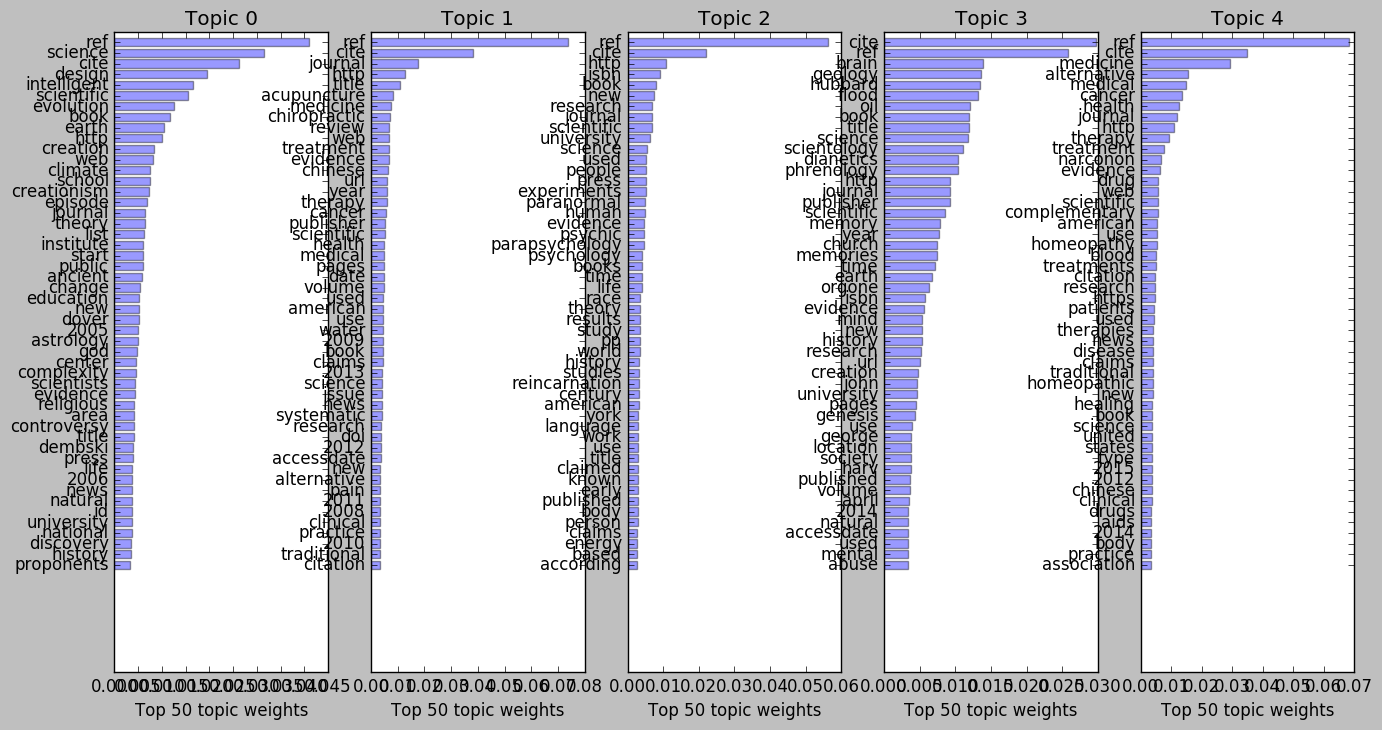

In [116]:
# SORTED TOKEN FREQUENCIES (II):
plt.rcdefaults()

n_bins = 50
    
# Example data
y_pos = range(n_bins-1, -1, -1)

pylab.rcParams['figure.figsize'] = 16, 8  # Set figure size

for i in range(n_topics):
    
    ### Plot top 25 tokens for topic i
    # Read i-thtopic
    # scode: <FILL IN>
    topic_i = topic_probs[i]
    rank = np.argsort(- topic_i)[0:n_bins]
    
    tokens = [tf_feature_names[r] for r in rank]
    weights = [topic_i[r] for r in rank]

    # Plot
    # scode: <FILL IN>
    plt.subplot(1, n_topics, i+1)
    plt.barh(y_pos, weights, align='center', alpha=0.4)
    plt.yticks(y_pos, tokens)
    plt.xlabel('Top {0} topic weights'.format(n_bins))
    plt.title('Topic {0}'.format(i))
    
plt.show()

**Exercise**: Explore the influence of the concentration parameters, $alpha$ (`doc_topic_prior` in `sklearn`) and $eta$(`topic_word_prior`). In particular observe how do topic and document distributions change as these parameters increase.

** Exercise**: The token dictionary and the token distribution have shown that:

1. Some tokens, despite being very frequent in the corpus, have no semantic relevance for topic modeling. Unfortunately, they were not present in the stopword list, and have not been elliminated before the analysis.

2. A large portion of tokens appear only once and, thus, they are not statistically relevant for the inference engine of the topic models.

Revise the entire corpus be removing from the corpus all these sets of terms.


** Exercise**: Note that we have not used the terms in the article titles, though the can be expected to contain relevant words for the topic modeling. Include the title words in the analyisis. In order to give them a special relevante, insert them in the corpus several times, so as to make their words more significant.




** Exercise**: The topic modelling algorithms we have tested in this notebook are non-supervised. This makes them difficult to evaluate objectivelly. In order to test if LDA captures real topics, construct a dataset as the mixture of wikipedia articles from 4 different categories, and test if LDA with 4 topics identifies topics closely related to the original categories.

#### Exercise:

Represent, in a scatter plot, the distribution of component 0 and 1 of the document-topic matrix (`corpus_lda`) for the whole corpus.